In [1]:
#!/usr/bin/env python
# coding: utf-8
# version: 2020.03.29

import sys
for path in ['../','../../','../../../','../../../../']:
    sys.path.append(path+"CNT_Code/V1.05.22")
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from RegressionTools import *
from GraphTools import *
from GeneralTools import *
# from GraphModel import *
from GraphModel_cnt import *
from CNT_Dataset import *
from ModelSelection import *

# --------------------------------------------------------------------------------------------------------
# args
# --------------------------------------------------------------------------------------------------------


# import argparse
# parser = argparse.ArgumentParser(description='Model selection')
# parser.add_argument('--id_graph', default=0, type=int, help='id_graph')

# args = parser.parse_args()
# id_graph = args.id_graph

# --------------------------------------------------------------------------------------------------------

In [2]:
id_graph = 10

GB_ESTIMATORS = 100 # 400
GB_SEARCH_ITER = 40 # 80
CV = 4
RATIO = 0.9
MULTI_ESTIMATOR = 10 # 50
MULTI_PREDICTION = 10 # 50
SCORE_RUN = 5

In [3]:
data_org = pd.read_excel('data_all_back_A.xlsx') 
graph_array = data_load('graph_array_368.dat')

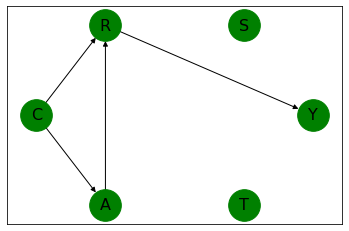

In [4]:
G = graph_array[id_graph]
nx_plot_cnt(G)

In [5]:
gm = GraphModel_cnt(G=G,idy='Y',renamer=cnt_renamer,
                    assign_submodel=assign_submodel_cnt,
                    gb_estimators=GB_ESTIMATORS,n_iter_search=GB_SEARCH_ITER,submodel_cv=CV,
                   )

score_array = []
for i in range(SCORE_RUN):
    data = random_resample(data_org)
    data = data.dropna(subset=gm.renamer(idAll),how='any').reset_index(drop=True) # all-valid
    score = cross_val_score_gm(gm,data,reuse=False,cv=CV,
                               ratio=RATIO,
                               n_estimator=MULTI_ESTIMATOR,
                               n_predict=MULTI_PREDICTION)
    score['model'] = nx2str(gm.G,model=True)
    score_array.append(score)

['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)'] A [0.46463978484528123, 0.4816972236194424, 0.6389734491976505]
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)', 'A'] R [0.6868663053279879, 0.6926506274604555, 0.8120950854719208]
['R'] Y [0.5229767420204132, 0.5235708124825912, 0.6629716851210866]
*,*,*,*,.
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)'] A [0.43221020060481596, 0.43794099695315725, 0.6724149125185249]
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)', 'A'] R [0.6669085370724654, 0.6717453420943251, 0.7778995678236903]
['R'] Y [0.5062502073652931, 0.5077295399258361, 0.6322095994041055]
*,*,*,*,.
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)'] A [0.5504143951142385, 0.5527574360220262, 0.6317136283550245]
['P3HT vol (µL)', 'D1 vol (µL)', 'D2 vol (µL)', 'D6 vol (µL)', 'D8 vol (µL)', 'A'] R [0.6879202011532073, 0.6912903499751131

In [6]:
scores = pd.concat(score_array)
# scores.to_excel('score_graph_%d.xlsx'%id_graph)
scores

,r2_score,mean_squared_error,scaled_rmse,r2_score (mean pred),mean_squared_error (mean pred),scaled_rmse (mean pred),r2_score (median pred),mean_squared_error (median pred),scaled_rmse (median pred),KL_Gaussian_inv (ps mean),...,KL_Gaussian_var (ps median),KL_Gaussian_inv(p) (ps mean),KL_Gaussian_var_inv(p) (ps mean),KL_Gaussian(p) (ps mean),KL_Gaussian_var(p) (ps mean),KL_Gaussian_inv(p) (ps median),KL_Gaussian_var_inv(p) (ps median),KL_Gaussian(p) (ps median),KL_Gaussian_var(p) (ps median),model
0,0.542238,1.026850,0.211656,0.601152,0.894695,0.197567,0.596572,0.904967,0.198698,48.187990,...,11.202324,48.223102,48.216215,139.247433,137.364218,18.042086,18.042086,22.880355,21.697282,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.637872,0.809101,0.189376,0.658362,0.763320,0.183941,0.620353,0.848243,0.193903,41.375899,...,22.503564,41.467040,41.458152,463.308044,455.527742,17.984235,17.984235,54.732850,51.255517,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.616227,0.864027,0.199459,0.661050,0.763113,0.187449,0.635887,0.819764,0.194283,43.284396,...,10.894442,41.610069,41.576691,287.963449,280.876149,19.676067,19.676067,59.161860,53.472658,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.571163,0.985640,0.211097,0.583411,0.957489,0.208061,0.569832,0.988698,0.211425,52.100116,...,23.000944,55.404825,55.368837,252.203256,249.577054,21.282495,21.282495,57.242804,56.339518,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
0,0.594807,0.959899,0.209801,0.625867,0.886320,0.201600,0.585763,0.981325,0.212130,47.436986,...,15.699676,49.343838,49.335216,185.270245,183.500786,15.495387,15.495387,29.428424,28.992269,"C->A(GradientBoostingRegressor), CA->R(Gradien..."
